In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs4

In [3]:
continents_page = requests.get("https://simple.wikipedia.org/wiki/List_of_countries_by_continents").text
continents_page

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-enabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of countries by continents - Simple English Wikipedia, the free encyclopedia</title>\n<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-enabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled v

In [4]:
continents_countries_soup = bs4(continents_page,"lxml")
continents = continents_countries_soup.find_all('h2' > 'span', {"class":"mw-headline"})
continents

[<span class="mw-headline" id="Africa">Africa</span>,
 <span class="mw-headline" id="Antarctica">Antarctica</span>,
 <span class="mw-headline" id="Asia">Asia</span>,
 <span class="mw-headline" id="Europe">Europe</span>,
 <span class="mw-headline" id="North_America">North America</span>,
 <span class="mw-headline" id="South_America">South America</span>,
 <span class="mw-headline" id="Oceania">Oceania</span>,
 <span class="mw-headline" id="References">References</span>,
 <span class="mw-headline" id="Other_websites">Other websites</span>]

In [5]:
unwanted_words = ["Antarctica","References","Other websites"]
target_continents = [continent.text for continent in continents if continent.text not in unwanted_words]
target_continents

['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania']

In [6]:
ol_html = continents_countries_soup.find_all('ol')
all_countries = [countries.find_all('li',{"class": None, "id": None}) for countries in ol_html]
all_countries

[[<li><a href="/wiki/Algeria" title="Algeria">Algeria</a> - <a href="/wiki/Algiers" title="Algiers">Algiers</a></li>,
  <li><a href="/wiki/Angola" title="Angola">Angola</a> - <a href="/wiki/Luanda" title="Luanda">Luanda</a></li>,
  <li><a href="/wiki/Benin" title="Benin">Benin</a> - <a class="mw-redirect" href="/wiki/Porto_Novo" title="Porto Novo">Porto Novo</a>, <a href="/wiki/Cotonou" title="Cotonou">Cotonou</a></li>,
  <li><a href="/wiki/Botswana" title="Botswana">Botswana</a> - <a href="/wiki/Gaborone" title="Gaborone">Gaborone</a></li>,
  <li><a href="/wiki/Burkina_Faso" title="Burkina Faso">Burkina Faso</a> - <a href="/wiki/Ouagadougou" title="Ouagadougou">Ouagadougou</a></li>,
  <li><a href="/wiki/Burundi" title="Burundi">Burundi</a> - <a href="/wiki/Gitega" title="Gitega">Gitega</a></li>,
  <li><a href="/wiki/Cameroon" title="Cameroon">Cameroon</a> (also spelled Cameroun) - <a href="/wiki/Yaound%C3%A9" title="Yaoundé">Yaoundé</a></li>,
  <li><a href="/wiki/Cape_Verde" title="Ca

In [7]:
countries_in_continents = []
for items in all_countries:
    countries = []
    if items:
        for country in items:
            countries = [country.find('a').text for country in items if country.find('a')]
        countries_in_continents.append(countries)
countries_in_continents

[['Algeria',
  'Angola',
  'Benin',
  'Botswana',
  'Burkina Faso',
  'Burundi',
  'Cameroon',
  'Cape Verde',
  'Central African Republic',
  'Chad',
  'Comoros',
  'Republic of the Congo',
  'Democratic Republic of the Congo',
  "Côte d'Ivoire",
  'Djibouti',
  'Equatorial Guinea',
  'Egypt',
  'Eritrea',
  'Ethiopia',
  'Gabon',
  'The Gambia',
  'Ghana',
  'Guinea',
  'Guinea-Bissau',
  'Kenya',
  'Lesotho',
  'Liberia',
  'Libya',
  'Madagascar',
  'Malawi',
  'Mali',
  'Mauritania',
  'Mauritius',
  'Morocco',
  'Mozambique',
  'Namibia',
  'Niger',
  'Nigeria',
  'Réunion',
  'Rwanda',
  'São Tomé and Príncipe',
  'Senegal',
  'Seychelles',
  'Sierra Leone',
  'Somalia',
  'South Africa',
  'South Sudan',
  'Sudan',
  'Swaziland',
  'Tanzania',
  'Togo',
  'Tunisia',
  'Uganda',
  'Western Sahara',
  'Zambia',
  'Zimbabwe'],
 ['Afghanistan',
  'Armenia',
  'Azerbaijan',
  'Bahrain',
  'Bangladesh',
  'Bhutan',
  'Brunei',
  'Cambodia',
  'China',
  'East Timor',
  'Georgia',
  '

In [8]:
countries_continent_category_df = pd.DataFrame(
    zip(countries_in_continents, target_continents), columns=['Country', 'Continent'])
countries_continent_category_df

,Country,Continent
0,"[Algeria, Angola, Benin, Botswana, Burkina Fas...",Africa
1,"[Afghanistan, Armenia, Azerbaijan, Bahrain, Ba...",Asia
2,"[Albania, Andorra, Austria, Belarus, Belgium, ...",Europe
3,"[Canada, Mexico, United States of America, Nav...",North America
4,"[Brazil, Argentina, Bolivia, Chile, Colombia, ...",South America
5,"[Australia, Fiji, New Zealand, Federated State...",Oceania


In [9]:
countries_continent_category_df = countries_continent_category_df.explode(
    'Country').reset_index(drop=True)
countries_continent_category_df

,Country,Continent
0,Algeria,Africa
1,Angola,Africa
2,Benin,Africa
3,Botswana,Africa
4,Burkina Faso,Africa
...,...,...
201,Samoa,Oceania
202,Solomon Islands,Oceania
203,Tonga,Oceania
204,Tuvalu,Oceania


In [17]:
countries_score_page = requests.get("https://wisevoter.com/country-rankings/happiest-countries-in-the-world/")
countries_score_soup = bs4(countries_score_page.content, 'lxml')

In [23]:
countries_score_table = countries_score_soup.find('table')
countries_score_table

<table class="shdb-on-page-table" id="shdb-on-page-table"><thead><tr><th>#</th><th>Country</th><th>Happiness Index</th></tr></thead><tbody><tr><td class="shdb-on-page-table-body-Rank">1</td><td class="shdb-on-page-table-body-Geo">Finland</td><td class="shdb-on-page-table-body-Data" data-order="1">7.82</td></tr><tr><td class="shdb-on-page-table-body-Rank">2</td><td class="shdb-on-page-table-body-Geo">Denmark</td><td class="shdb-on-page-table-body-Data" data-order="2">7.64</td></tr><tr><td class="shdb-on-page-table-body-Rank">3</td><td class="shdb-on-page-table-body-Geo">Iceland</td><td class="shdb-on-page-table-body-Data" data-order="3">7.56</td></tr><tr><td class="shdb-on-page-table-body-Rank">4</td><td class="shdb-on-page-table-body-Geo">Switzerland</td><td class="shdb-on-page-table-body-Data" data-order="4">7.51</td></tr><tr><td class="shdb-on-page-table-body-Rank">5</td><td class="shdb-on-page-table-body-Geo">Netherlands</td><td class="shdb-on-page-table-body-Data" data-order="5">7.

In [24]:
countries_score_df = pd.read_html(str(countries_score_table))
countries_score_df

[       #      Country  Happiness Index
 0      1      Finland             7.82
 1      2      Denmark             7.64
 2      3      Iceland             7.56
 3      4  Switzerland             7.51
 4      5  Netherlands             7.42
 ..   ...          ...              ...
 137  138     Botswana             3.47
 138  139       Rwanda             3.27
 139  140     Zimbabwe             3.00
 140  141      Lebanon             2.96
 141  142  Afghanistan             2.40
 
 [142 rows x 3 columns]]

In [25]:
countries_score_df = countries_score_df[0]
countries_score_df = countries_score_df.rename(columns={"Country or region":"Country"})
countries_score_df

,#,Country,Happiness Index
0,1,Finland,7.82
1,2,Denmark,7.64
2,3,Iceland,7.56
3,4,Switzerland,7.51
4,5,Netherlands,7.42
...,...,...,...
137,138,Botswana,3.47
138,139,Rwanda,3.27
139,140,Zimbabwe,3.00
140,141,Lebanon,2.96


In [26]:
merged_df = pd.merge(countries_score_df, countries_continent_category_df, how='inner', on='Country')
merged_df.to_csv('final_result2.csv')
merged_df

,#,Country,Happiness Index,Continent
0,1,Finland,7.82,Europe
1,2,Denmark,7.64,Europe
2,3,Iceland,7.56,Europe
3,4,Switzerland,7.51,Europe
4,5,Netherlands,7.42,Europe
...,...,...,...,...
135,138,Botswana,3.47,Africa
136,139,Rwanda,3.27,Africa
137,140,Zimbabwe,3.00,Africa
138,141,Lebanon,2.96,Asia


Text(0, 0.5, 'Happiness Index')

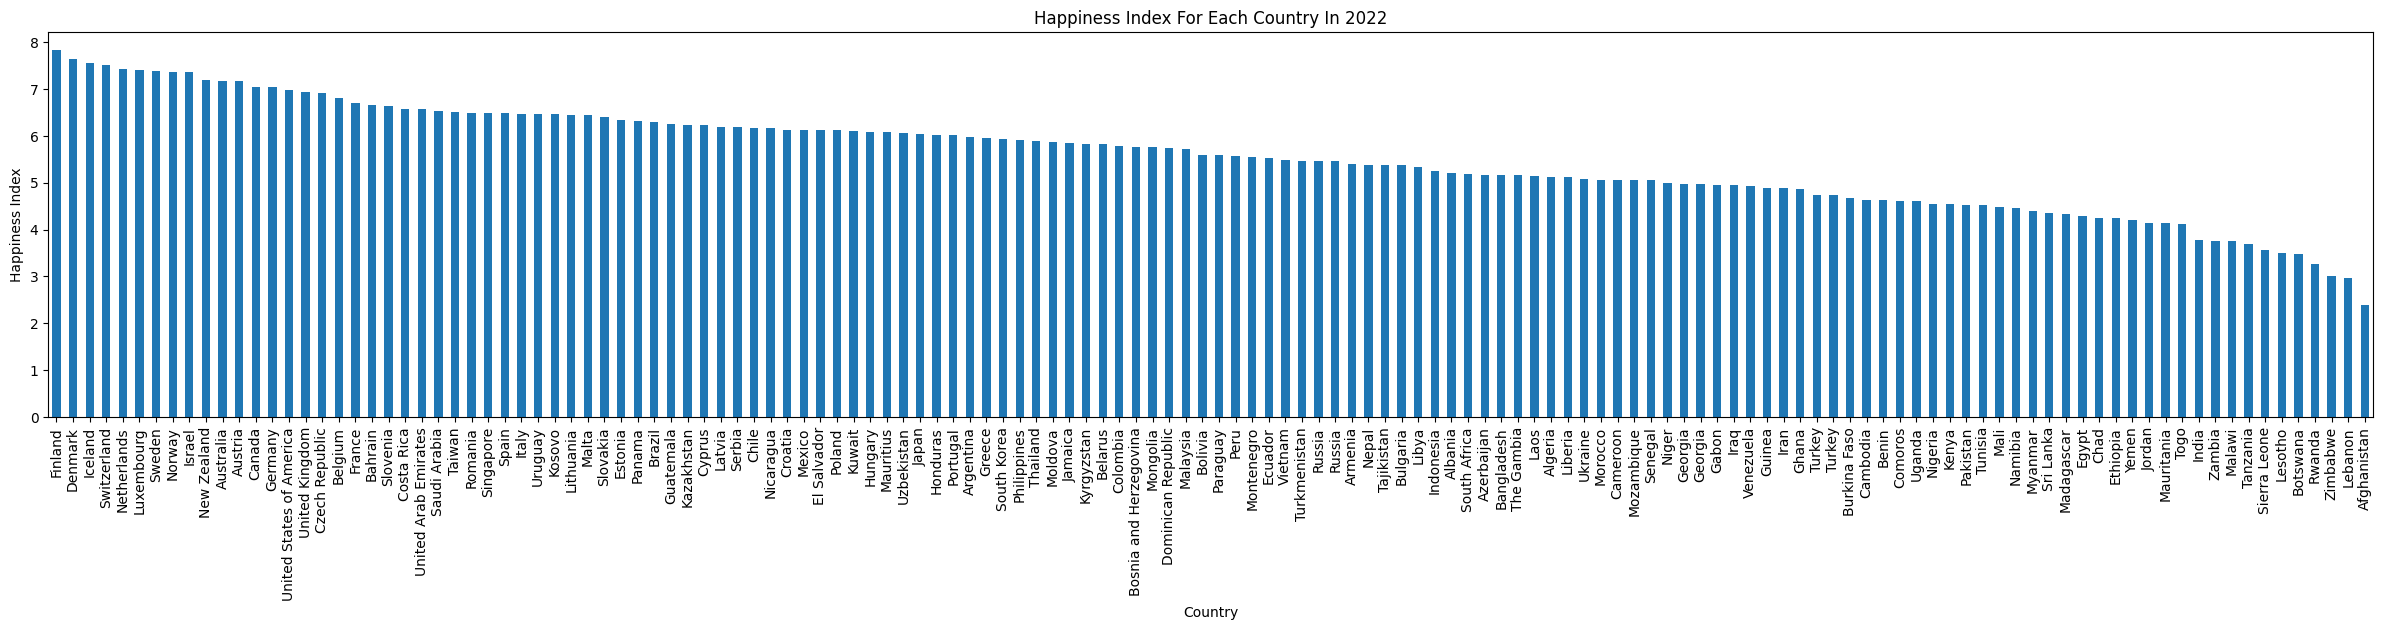

In [27]:
final_result_df_score_index = pd.read_csv('final_result2.csv', index_col=2)
ax = final_result_df_score_index['Happiness Index'].plot(kind='bar', figsize=(30,5), title="Happiness Index For Each Country In 2022")
ax.set_ylabel("Happiness Index")

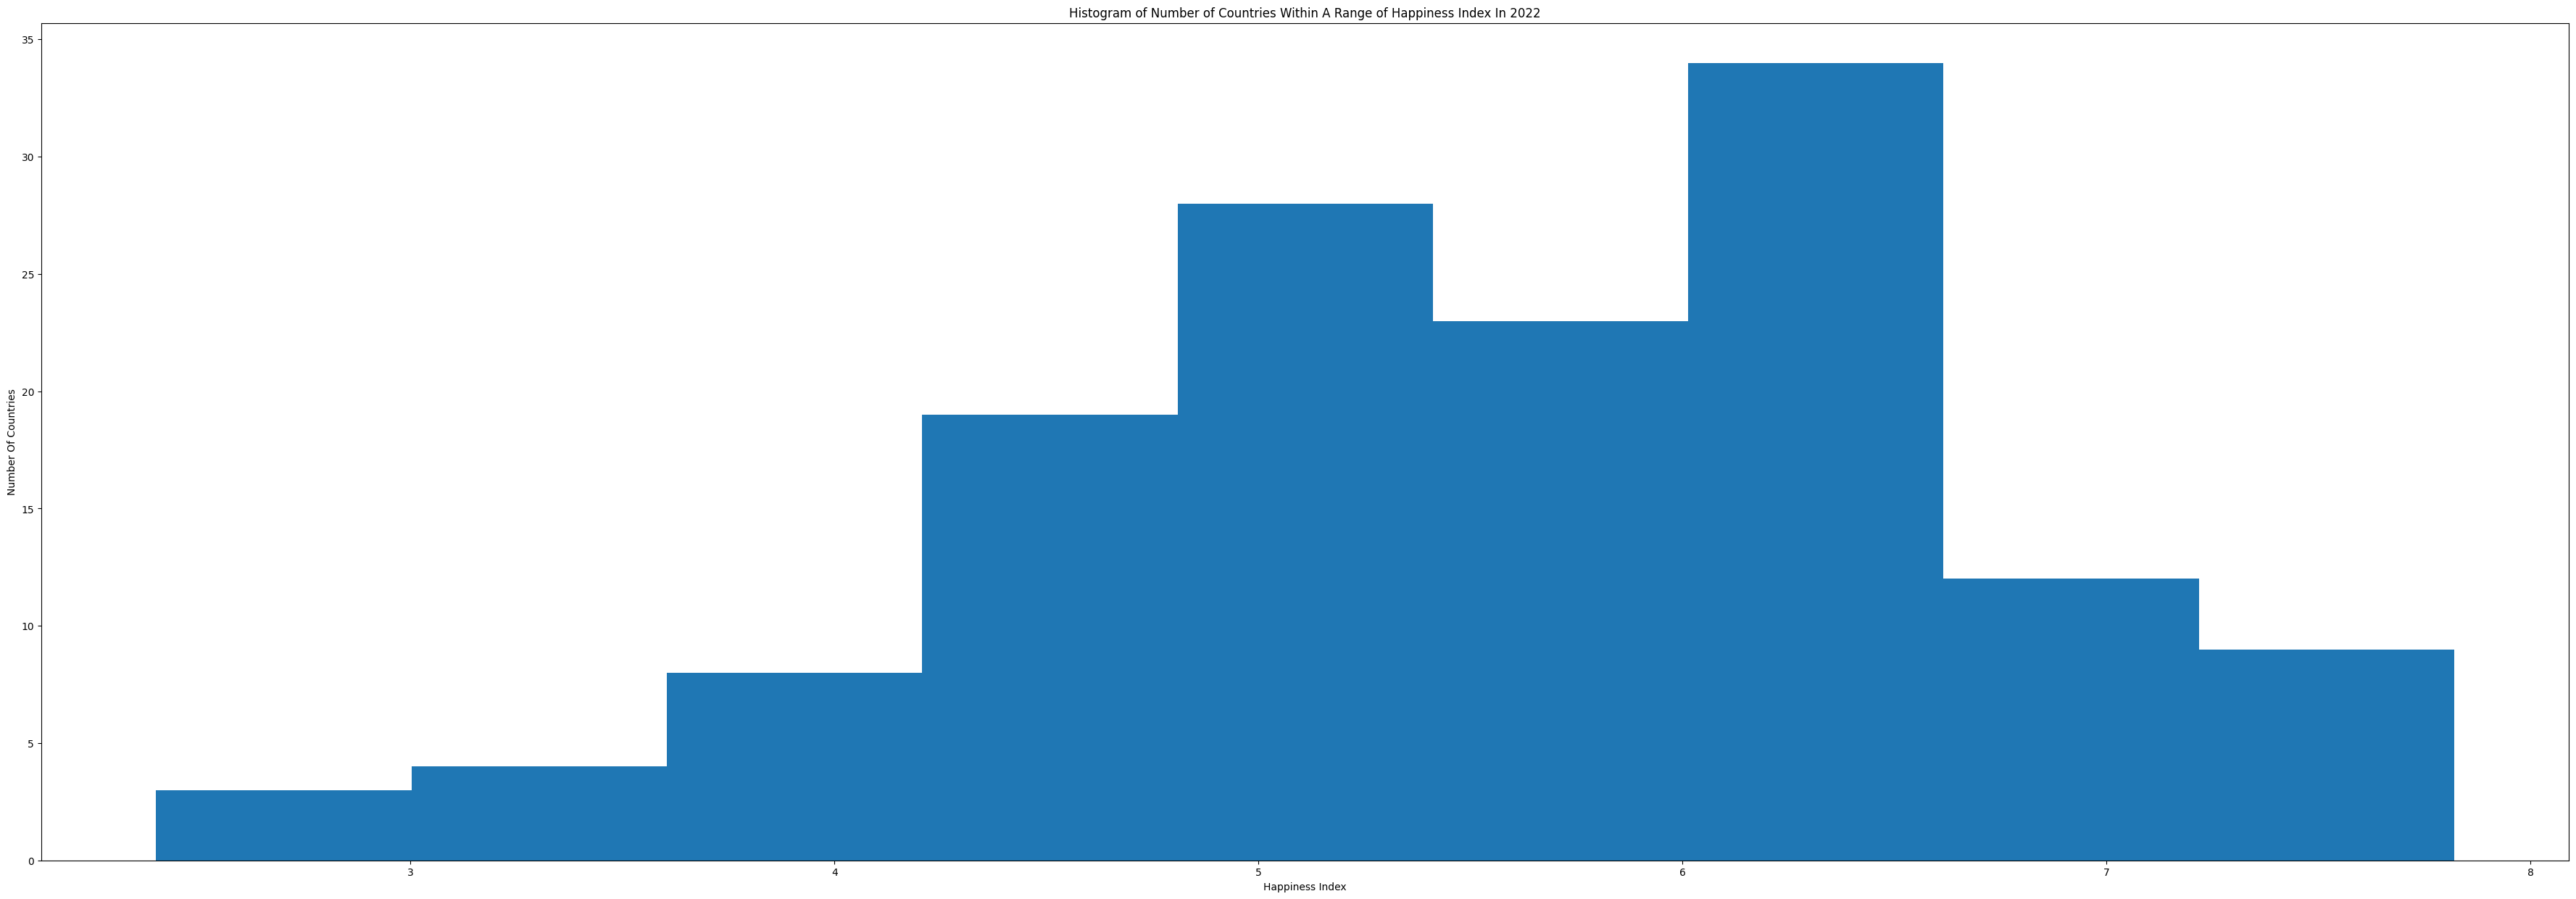

In [31]:
plt.figure(figsize=(45,15))
plt.title("Histogram of Number of Countries Within A Range of Happiness Index In 2022")
plt.xlabel("Happiness Index")
plt.ylabel("Number Of Countries")
plt.hist(final_result_df_score_index['Happiness Index'], bins=9)
plt.show()

In [32]:
median_happiness_score = merged_df['Happiness Index'].median()
countries_above_median = merged_df.loc[merged_df['Happiness Index'] > median_happiness_score]
print(countries_above_median['Country'].to_list())

['Finland', 'Denmark', 'Iceland', 'Switzerland', 'Netherlands', 'Luxembourg', 'Sweden', 'Norway', 'Israel', 'New Zealand', 'Australia', 'Austria', 'Canada', 'Germany', 'United States of America', 'United Kingdom', 'Czech Republic', 'Belgium', 'France', 'Bahrain', 'Slovenia', 'Costa Rica', 'United Arab Emirates', 'Saudi Arabia', 'Taiwan', 'Romania', 'Singapore', 'Spain', 'Italy', 'Uruguay', 'Kosovo', 'Lithuania', 'Malta', 'Slovakia', 'Estonia', 'Panama', 'Brazil', 'Guatemala', 'Kazakhstan', 'Cyprus', 'Latvia', 'Serbia', 'Chile', 'Nicaragua', 'Croatia', 'Mexico', 'El Salvador', 'Poland', 'Kuwait', 'Hungary', 'Mauritius', 'Uzbekistan', 'Japan', 'Honduras', 'Portugal', 'Argentina', 'Greece', 'South Korea', 'Philippines', 'Thailand', 'Moldova', 'Jamaica', 'Kyrgyzstan', 'Belarus', 'Colombia', 'Bosnia and Herzegovina', 'Mongolia', 'Dominican Republic', 'Malaysia', 'Bolivia']


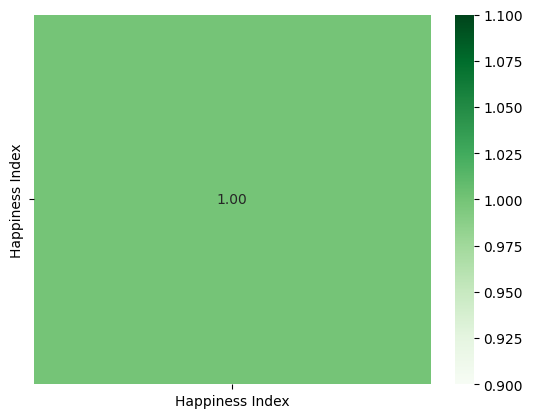

In [33]:
heatmap_df = merged_df.drop(['#', 'Country', 'Continent'], axis=1)
ax = sns.heatmap(heatmap_df.corr(), annot=True, fmt='.2f', cmap='Greens')

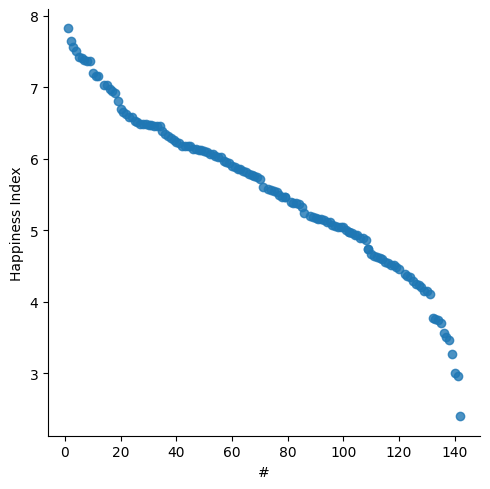

In [38]:
sns.lmplot(x='#', y='Happiness Index', data=merged_df, fit_reg=False)

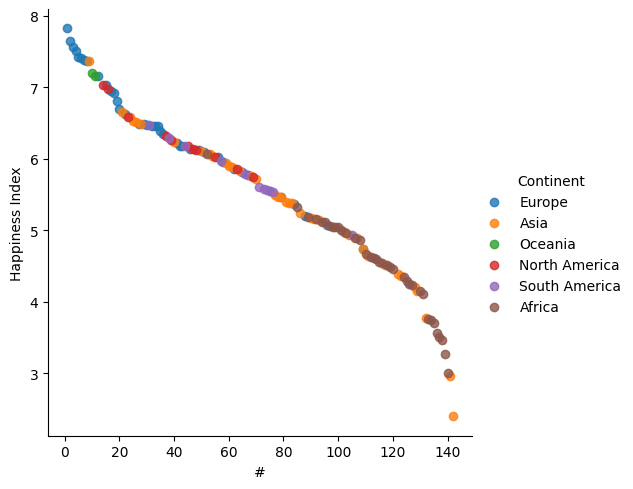

In [37]:
sns.lmplot(x='#', y='Happiness Index', data=merged_df, fit_reg=False, hue='Continent')